# Data set analysis
Create heatmap for dataset

Generating synthetic 'Trap' data for visualization...
    Generating Synthetic Data: N=1000, p=500, Blocks=1, Corr=0.9
    Computed Correlation Matrix A: (500, 500)
Plotting heatmap... this might take a few seconds...

Visualization saved to:
/Users/nautilus/gridfw/logs/plots/data_visualizations/heatmap_synthetic_trap_p500_b1_c90.pdf


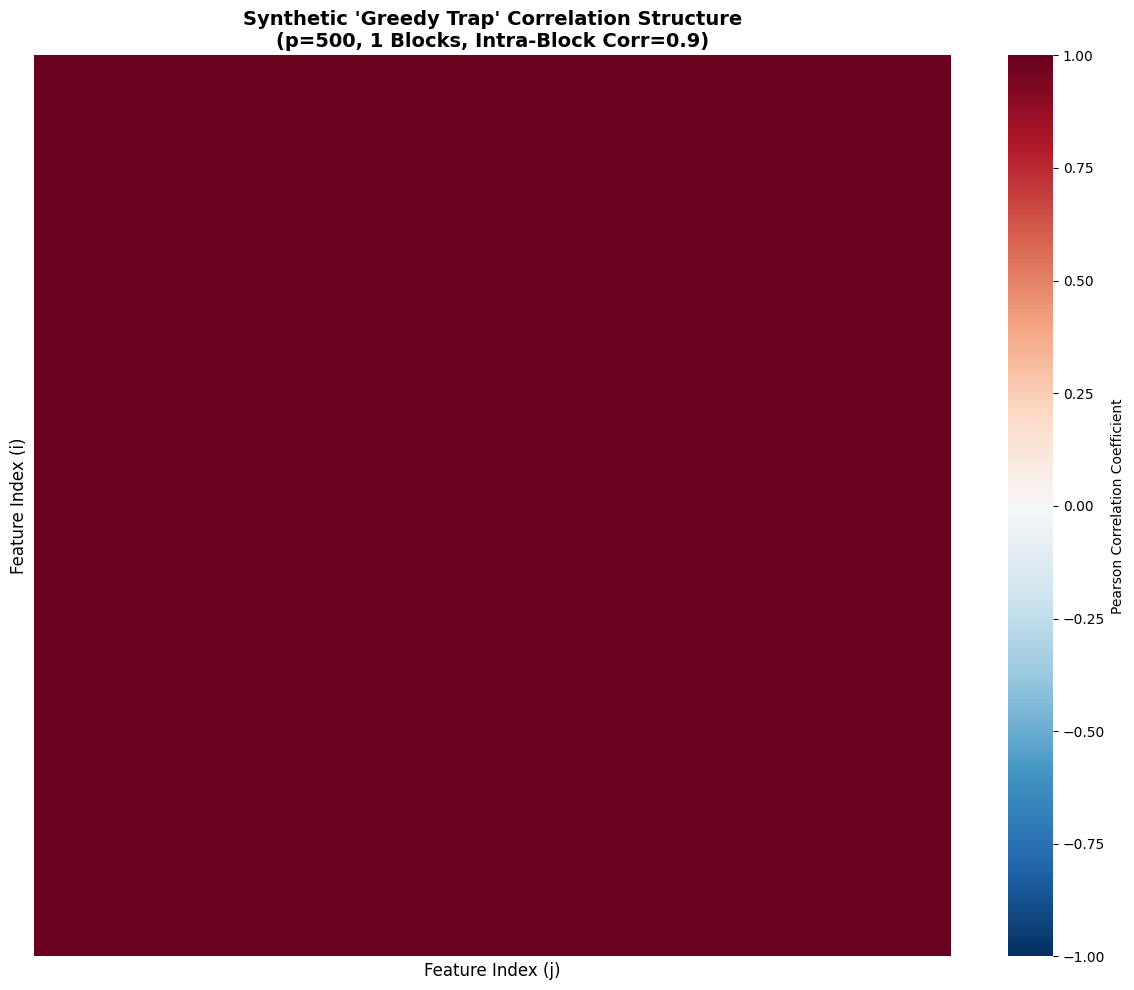

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from grad_fw.data_loader import DatasetLoader

# ==========================================
# Configuration for Visualization
# ==========================================
# We use smaller p and fewer blocks here so the heatmap is easy to read on screen.
N_VIS = 1000
P_VIS = 500        # 500 features total
BLOCKS_VIS = 1    # 10 blocks of 50 features each
CORR_VIS = 0.9     # 90% correlation within blocks

# Setup paths
try:
    SCRIPT_DIR = Path(__file__).resolve().parent
except NameError:
    # We are in a notebook/interactive session
    SCRIPT_DIR = Path(os.getcwd()).resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
SAVE_DIR =  PROJECT_ROOT / "logs" / "plots" / "data_visualizations"
os.makedirs(SAVE_DIR, exist_ok=True)
SAVE_PATH = SAVE_DIR / f"heatmap_synthetic_trap_p{P_VIS}_b{BLOCKS_VIS}_c{int(CORR_VIS*100)}.pdf"

# ==========================================
# 1. Generate Data
# ==========================================
loader = DatasetLoader()
print("Generating synthetic 'Trap' data for visualization...")
A_matrix, _ = loader.generate_high_dim_correlated_data(
    N=N_VIS, 
    p=P_VIS, 
    n_blocks=BLOCKS_VIS, 
    correlation_strength=CORR_VIS
)

# ==========================================
# 2. Plot Heatmap
# ==========================================
print("Plotting heatmap... this might take a few seconds...")
def heatmap_corr_A_matrix(A_matrix):
    fig, ax = plt.subplots(figsize=(12, 10))

    # Use Seaborn heatmap
    # cmap="RdBu_r": Red for positive correlation, Blue for negative, White for zero.
    # vmin=-1, vmax=1, center=0: Ensures the color scale is balanced correctly for correlations.
    sns.heatmap(
        A_matrix,
        cmap="RdBu_r",
        center=0,
        vmin=-1,
        vmax=1,
        xticklabels=False, # Turn off tick labels as they will overlap for p=500
        yticklabels=False,
        cbar_kws={"label": "Pearson Correlation Coefficient"},
        ax=ax
    )

    # Styling
    ax.set_title(
        f"Synthetic 'Greedy Trap' Correlation Structure\n"
        f"(p={P_VIS}, {BLOCKS_VIS} Blocks, Intra-Block Corr={CORR_VIS})",
        fontsize=14, fontweight='bold'
    )
    ax.set_xlabel("Feature Index (j)", fontsize=12)
    ax.set_ylabel("Feature Index (i)", fontsize=12)

    plt.tight_layout()

    # ==========================================
    # 3. Save and Show
    # ==========================================
    plt.savefig(SAVE_PATH, dpi=300, bbox_inches='tight')
    print(f"\nVisualization saved to:\n{SAVE_PATH}")
    plt.show()
heatmap_corr_A_matrix(A_matrix=A_matrix)

Plotting heatmap with values...

Visualization saved to:
/Users/nautilus/gridfw/logs/plots/data_visualizations/heatmap_synthetic_trap_p500_b1_c90.pdf


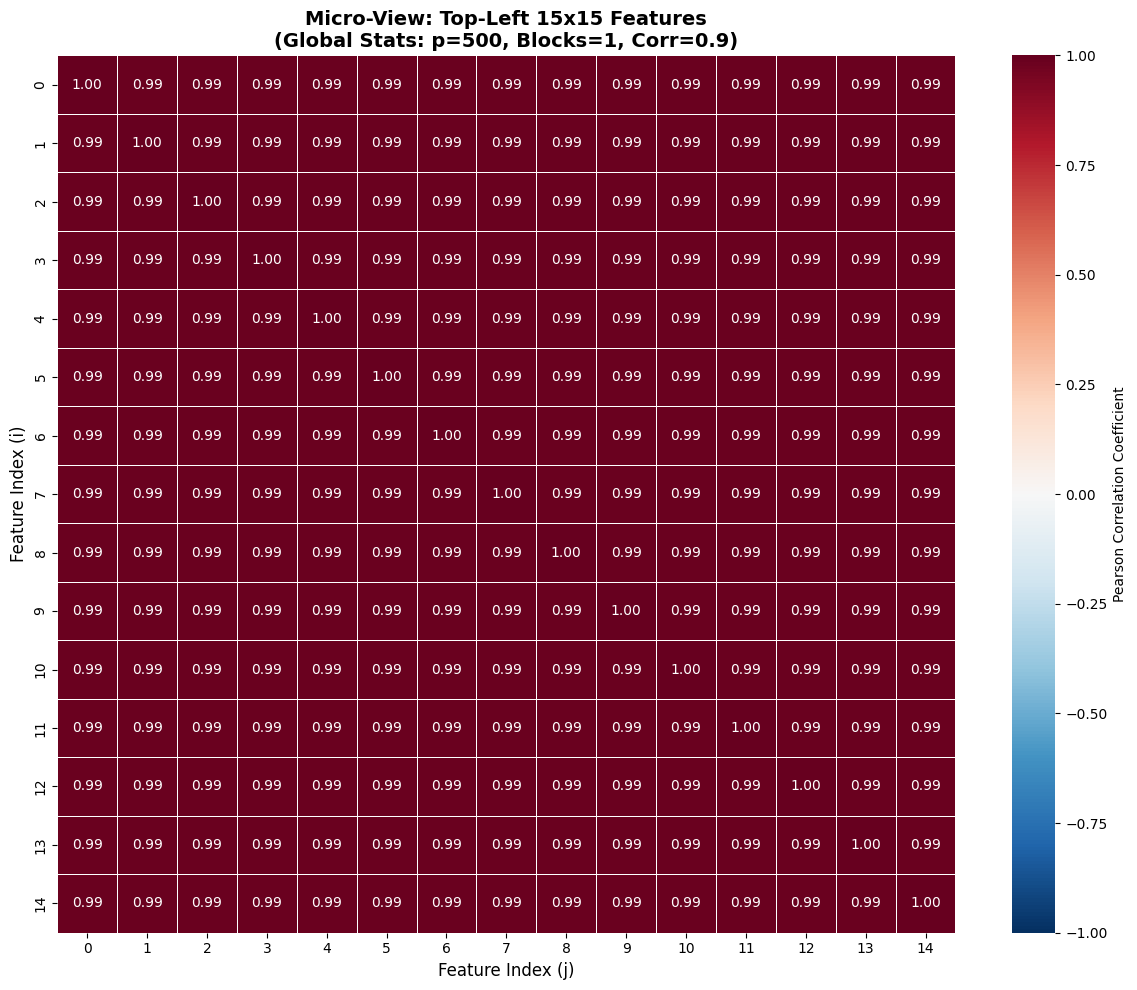

In [3]:
print("Plotting heatmap with values...")

def heatmap_corr_values(A_matrix, zoom_size=15):
    """
    Plots a subset (zoom_size x zoom_size) of the matrix with text annotations.
    """
    # SLICE THE MATRIX: Only take the top-left corner for readability
    A_subset = A_matrix[:zoom_size, :zoom_size]

    fig, ax = plt.subplots(figsize=(12, 10))

    sns.heatmap(
        A_subset,
        cmap="RdBu_r",
        center=0,
        vmin=-1,
        vmax=1,
        annot=True,          # <--- SHOW VALUES
        fmt=".2f",           # <--- 2 Decimal Places (e.g. 0.91)
        annot_kws={"size": 10}, # Text size
        linewidths=0.5,      # Add grid lines for clarity
        cbar_kws={"label": "Pearson Correlation Coefficient"},
        ax=ax
    )

    # Styling
    ax.set_title(
        f"Micro-View: Top-Left {zoom_size}x{zoom_size} Features\n"
        f"(Global Stats: p={P_VIS}, Blocks={BLOCKS_VIS}, Corr={CORR_VIS})",
        fontsize=14, fontweight='bold'
    )
    ax.set_xlabel("Feature Index (j)", fontsize=12)
    ax.set_ylabel("Feature Index (i)", fontsize=12)

    plt.tight_layout()

    # Save
    plt.savefig(SAVE_PATH, dpi=300, bbox_inches='tight')
    print(f"\nVisualization saved to:\n{SAVE_PATH}")
    plt.show()

# Run the plotting function
heatmap_corr_values(A_matrix=A_matrix, zoom_size=15)

In [ ]:
A_matrix = loader.load("residential")


  > Loading dataset: residential
    Source: https://archive.ics.uci.edu/ml/machine-learning-databases/00437/Residential-Building-Data-Set.xlsx


/Users/nautilus/gridfw/.venv/lib/python3.14/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


    Raw Data Shape: 372 rows x 103 features
    Computed Correlation Matrix A: (103, 103)


TypeError: tuple indices must be integers or slices, not tuple